In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, MaxPool2D, Conv2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1,l2,l1_l2
from keras import regularizers

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Unzip the dataset
!unzip garbageClassification.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardb

In [7]:
# Data preprocessing steps
train_dir = os.path.join('Garbage classification/Garbage classification')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']



train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255.,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [8]:
# Creating the MLP model
def get_mlp_model():
  model = Sequential();
  model.add(Flatten(input_shape = (128,128,3)))
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(128,activation='relu',kernel_regularizer=l1(0.01),bias_regularizer=l2(0.01)))
  model.add(Dropout(rate=0.5))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(32,activation='relu'))
  model.add(Dropout(rate=0.3))
  model.add(Dense(6,activation='softmax'))


  return model

#  Early stopping function is defined, and the patience value is set
earlystopCB = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)


model = get_mlp_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               12583168  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)               

In [9]:
# Compiling the model with loss function, optimizer, and evaluation metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [10]:
# Training the model using the fit() function
history = model.fit(train_generator, epochs=100, verbose=1, validation_data=validation_generator,batch_size=32,callbacks=[earlystopCB])

Epoch 1/100
64/64 [==============================] - 33s 492ms/step - loss: 24.6788 - accuracy: 0.1719 - val_loss: 12.3184 - val_accuracy: 0.2346
Epoch 2/100
64/64 [==============================] - 31s 489ms/step - loss: 9.7995 - accuracy: 0.2322 - val_loss: 8.2447 - val_accuracy: 0.2346
Epoch 3/100
64/64 [==============================] - 33s 508ms/step - loss: 7.7438 - accuracy: 0.2288 - val_loss: 7.3125 - val_accuracy: 0.2346
Epoch 4/100
64/64 [==============================] - 32s 492ms/step - loss: 6.9741 - accuracy: 0.2352 - val_loss: 6.6411 - val_accuracy: 0.2346
Epoch 5/100
64/64 [==============================] - 31s 479ms/step - loss: 6.3469 - accuracy: 0.2302 - val_loss: 6.0572 - val_accuracy: 0.2346
Epoch 6/100
64/64 [==============================] - 32s 501ms/step - loss: 5.8048 - accuracy: 0.2312 - val_loss: 5.5524 - val_accuracy: 0.2346
Epoch 7/100
64/64 [==============================] - 31s 479ms/step - loss: 5.3236 - accuracy: 0.2337 - val_loss: 5.0944 - val_accurac

[Text(0.5, 0, 'Epochs')]

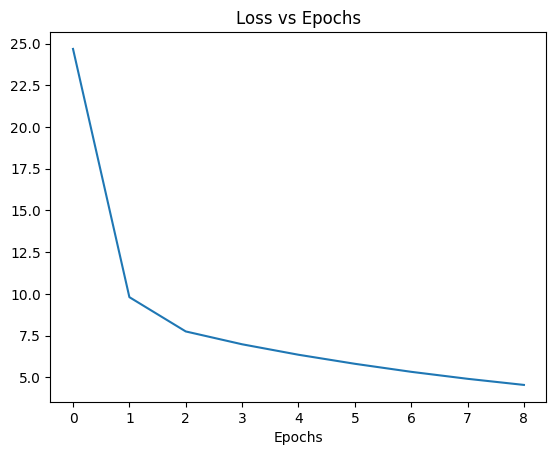

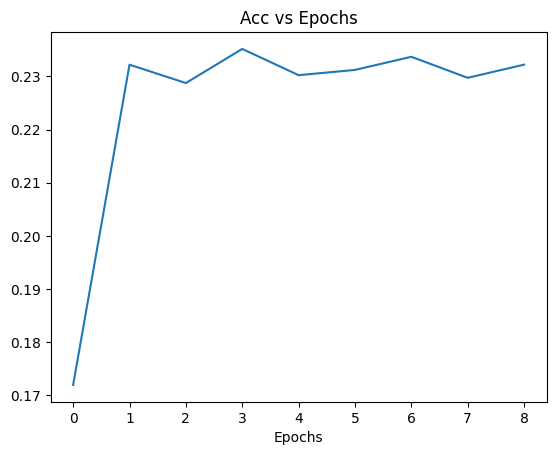

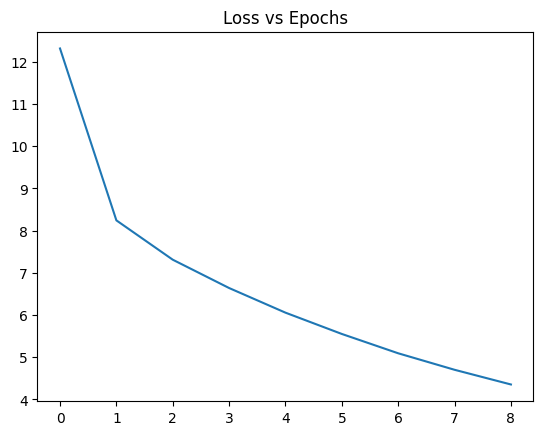

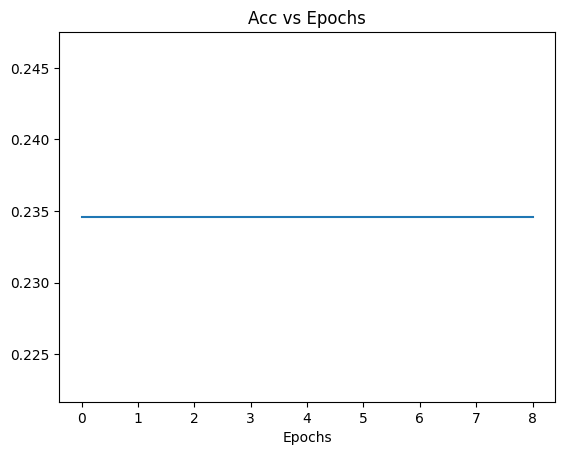

In [11]:
# Creating and plotting training and validation loss and accuracy curves

df = pd.DataFrame(history.history)
df.head()
loss_plot = df.plot(y = 'loss' , title = 'Loss vs Epochs', legend= False)
loss_plot.set(xlabel='Epochs')

acc_plot = df.plot(y = 'accuracy' , title = 'Acc vs Epochs', legend= False)
acc_plot.set(xlabel='Epochs')

loss_plot = df.plot(y = 'val_loss' , title = 'Loss vs Epochs', legend= False)

acc_plot = df.plot(y = 'val_accuracy' , title = 'Acc vs Epochs', legend= False)
acc_plot.set(xlabel='Epochs')

In [13]:
# Testing the model
test_loss,test_acc = model.evaluate(validation_generator,verbose=1)


16/16 [==============================] - 4s 276ms/step - loss: 4.3552 - accuracy: 0.2346
